In [577]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp,pow
from scipy.special import expit as sigmoid

In [578]:
data=pd.read_csv('/content/Salary_Data.csv')

In [579]:
data.head(n=10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [580]:
data['Salary<60000']=np.where(data['Salary']<60000, 1 ,0)

# Visualising the Data

In [581]:
data.sample(n=10)

,YearsExperience,Salary,Salary<60000
15,4.9,67938.0,0
1,1.3,46205.0,1
18,5.9,81363.0,0
5,2.9,56642.0,1
25,9.0,105582.0,0
17,5.3,83088.0,0
27,9.6,112635.0,0
14,4.5,61111.0,0
10,3.9,63218.0,0
26,9.5,116969.0,0


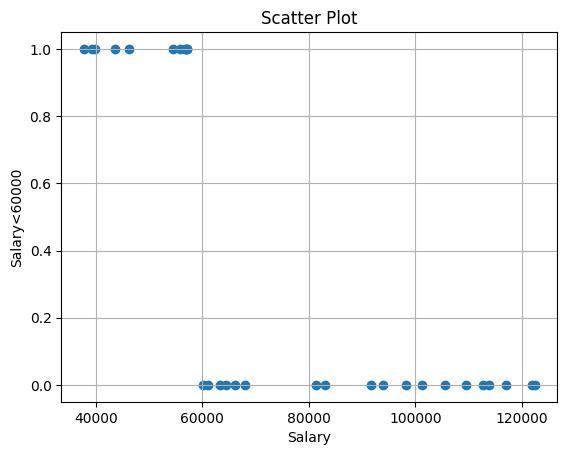

In [602]:
X=data['Salary']
Y=data['Salary<60000']

plt.scatter(X, Y)

plt.xlabel('Salary')
plt.ylabel('Salary<60000')
plt.title('Scatter Plot')
plt.grid()

plt.show()

## Defining the Logistic Regression Model and Other Important Functions

In [583]:
def Logistic_Regression(points, epochs, lr):


  w = 0
  b = 0

  n = len(points)

  for _ in range(epochs):
      w_grad = 0
      b_grad = 0

      for j in range(n):
          x = points['Salary'].iloc[j]/10000
          y = points['Salary<60000'].iloc[j]
          exponent = w * x + b

          y_cap = sigmoid(exponent)

          w_grad += (1 / n) * x * (y_cap - y)
          b_grad += (1 / n) * (y_cap - y)

      w -= lr * w_grad
      b -= lr * b_grad

  return [w, b]

In [584]:
def accuracy(y_pred, y_true):

    correct_predictions = np.sum(y_pred == y_true)
    total_predictions = y_pred.size
    accuracy = correct_predictions / total_predictions

    return accuracy

In [596]:
def predict(points, model):

  n=len(points)
  w_pred=model[0]
  b_pred=model[1]

  preds=[]

  for i in range(n):

    x=points['Salary'].iloc[i]/10000
    exponent = w_pred * x + b_pred

    y_pred=sigmoid(exponent)

    preds.append(y_pred)
  
  preds=np.array(preds)

  points['y_pred']=np.where(preds<=0.5, 0, 1)

  print("Accuracy of the model: ", accuracy(points['y_pred'], points['Salary<60000']))
  print()

  return preds

In [586]:
def model_plot(model, X_train, X_test, y_train, y_test):
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='lightgreen', label='Test Data')
    plt.xlabel('Salary')
    plt.ylabel('Salary<60000')
    plt.title('Scatter Plot')

    x = np.linspace(10000, 150000, 10000)
    y = sigmoid(model[0] * (x / 10000) + model[1])

    plt.plot(x, y, color='red', label='Log Reg Decision Boundary')
    plt.grid()
    plt.legend()
    plt.show()

# Implementing the model on Salary Data

In [587]:
X=data['Salary']
y=data['Salary<60000']

In [588]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [589]:
train=pd.DataFrame()
train['Salary']=X_train
train['Salary<60000']=y_train

test=pd.DataFrame()
test['Salary']=X_test
test['Salary<60000']=y_test

In [590]:
model=Logistic_Regression(train,epochs=1000,lr=0.05)

In [601]:
print("For Training Data:\n")
predict(train, model)

For Training Data:

Accuracy of the model:  1.0



array([0.75361725, 0.74732184, 0.37305089, 0.51417841, 0.50744865,
       0.52716135, 0.06397799, 0.66752768, 0.7715162 , 0.04994146,
       0.70296111, 0.07604943, 0.0254751 , 0.1884872 , 0.0189831 ,
       0.10945093, 0.54773213, 0.41418299, 0.44585364, 0.09696147,
       0.4604622 ])

In [592]:
train

,Salary,Salary<60000,y_pred
0,39343.0,1,1
4,39891.0,1,1
16,66029.0,0,0
5,56642.0,1,1
13,57081.0,1,1
11,55794.0,1,1
22,101302.0,0,0
1,46205.0,1,1
2,37731.0,1,1
25,105582.0,0,0


In [600]:
print("For Test Data:\n")
predict(test, model)

For Test Data:

Accuracy of the model:  1.0



array([0.03297854, 0.34609132, 0.03075183, 0.17283077, 0.3960444 ,
       0.50579253, 0.01839914, 0.03985629, 0.50934992])

In [594]:
test

,Salary,Salary<60000,y_pred
27,112635.0,0,0
15,67938.0,0,0
23,113812.0,0,0
17,83088.0,0,0
8,64445.0,0,0
9,57189.0,1,1
28,122391.0,0,0
24,109431.0,0,0
12,56957.0,1,1


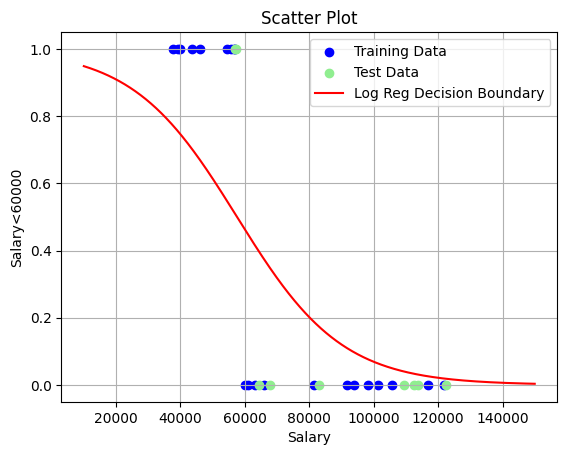

In [595]:
model_plot(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)